In [2]:
import numpy as np
import pandas as pd
from ProjectDataBase import *

stardle_db = pd.read_csv('NE PAS TOUCHER.csv', na_values = ['               ','       '])

stardle_db

FileNotFoundError: File /home/leferre/Bureau/Fac/base de données/Projet/Stardle_Data_Base/shipDB_All.json does not exist

In [2]:
ingame = pd.read_csv('#DPSCalculatorCART(1).csv')
#ingame.drop(['Shop','Location','System','Quantity','Unnamed: 6'],axis=1,inplace=True)
Ingame = pd.DataFrame.to_dict(ingame)
valeurs = list(Ingame.values())
noms = list(valeurs[0].values())
P={}
for name,prix in zip(noms,list(valeurs[5].values())):
    P[name] = prix
    
P = dict(sorted(P.items()))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original DataFrame for comparison
n_df = stardle_db.copy()
# Identify numerical columns
numerical_columns = n_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns identified: {numerical_columns}")

# Create and fit the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns and replace original values
n_df[numerical_columns] = scaler.fit_transform(n_df[numerical_columns])


# Display summary statistics for comparison
print("\nOriginal DataFrame - Summary Statistics:")
print(stardle_db[numerical_columns].describe())

print("\nNormalized DataFrame - Summary Statistics:")
print(n_df[numerical_columns].describe())

print("\nStandardization completed successfully!")
print("Note: After standardization, each numerical column should have a mean of ~0 and standard deviation of ~1.")


n_df.to_csv('normalized_db.csv', index=False)


Numerical columns identified: ['cargo_capacity ', 'crew ', 'price  ', 'scm    ', 'max    ', 'length ', 'beam   ', 'height']

Original DataFrame - Summary Statistics:
       cargo_capacity        crew       price        scm          max      \
count       201.000000  201.000000   201.000000   171.000000   167.000000   
mean        755.288557    3.129353   237.786070   192.956140   957.434132   
std        7092.972497    6.380688   334.565687   157.861572   424.486804   
min           0.000000    1.000000     0.000000     2.000000     2.000000   
25%           0.000000    1.000000    60.000000   160.000000   900.000000   
50%           0.000000    2.000000   150.000000   207.000000  1110.000000   
75%          46.000000    3.000000   275.000000   225.000000  1200.000000   
max       98304.000000   80.000000  3000.000000  2020.000000  1485.000000   

          length      beam         height  
count  201.000000  201.000000  201.000000  
mean    45.854677   28.725323   12.636169  
std    

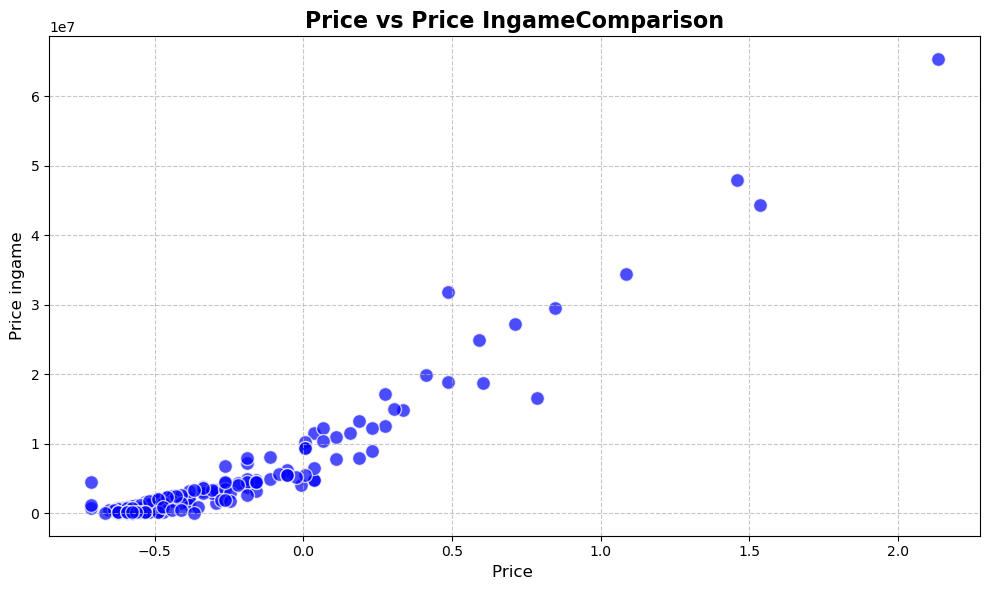

Number of data points: 148
Correlation coefficient: 0.9475111545125116


In [4]:
import matplotlib.pyplot as plt
# Clean and convert price and mass columns to numeric values
# This ensures any string values or other non-numeric data is properly handled
n_df['price  '] = pd.to_numeric(n_df['price  '], errors='coerce')
n_df['price_ingame   '] = pd.to_numeric(n_df['price_ingame   '], errors='coerce')

# Drop rows where either price or mass is NaN
df_clean = n_df.dropna(subset=['price  ', 'price_ingame   '])

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['price  '], df_clean['price_ingame   '], alpha=0.7, c='blue', edgecolors='w', s=100)

# Add title and labels
plt.title('Price vs Price IngameComparison', fontsize=16, fontweight='bold')
plt.xlabel('Price ', fontsize=12)
plt.ylabel('Price ingame', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve aesthetics
plt.tight_layout()

# Display the plot
plt.show()  # Display the figure

# Print some basic statistics
print("Number of data points:", len(df_clean))
print("Correlation coefficient:", df_clean['price  '].corr(df_clean['price_ingame   ']))

Pente :  [20473711.81482849]
Ordonnée à l'origine :  10621104.42827389
Racine carrée de l'erreur quadratique moyenne :  9033357396972.262
Sccore R2 :  0.6210006460532531


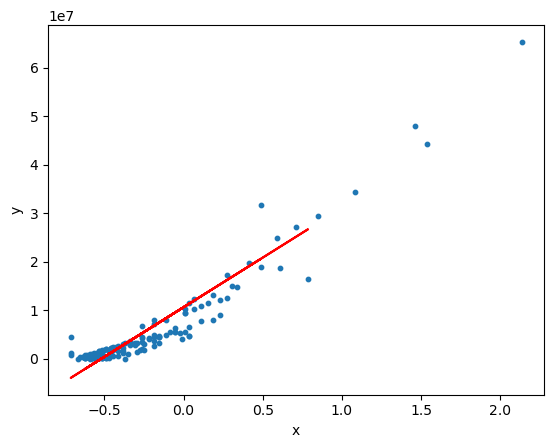

In [106]:
# Importations
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Extract the features and target
X = n_df['price  '].values  
y = n_df['price_ingame   '].values  

# Drop any rows with NaN values
valid_indices = ~(np.isnan(X) | np.isnan(y))
X = X[valid_indices]
y = y[valid_indices]

# initialisation du modèle
regression_model = linear_model.Ridge(alpha= 0.0)
# Adapter les données (entraînement du modèle)
X_reshaped = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped,y, test_size=0.2,)
regression_model.fit(X_train,y_train)
# Prédiction
y_predicted = regression_model.predict(X_test)
# Évaluation du modèle
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(X_reshaped, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
# Valeurs prédites
plt.plot(X_test, y_predicted, color='r')
plt.show()

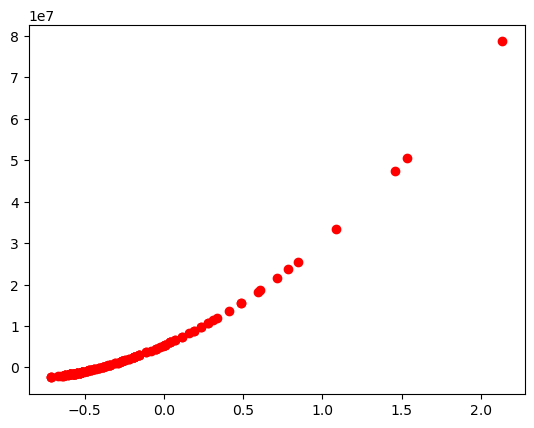

In [107]:
coeff = np.polyfit(X, y, 2)

def f(x):
    return coeff[0]+coeff[1]*x+coeff[2]*x**2
plt.scatter(X, f(X), c='r')

In [ ]:
coeff

In [ ]:
copie_stardle_db = stardle_db.copy(deep=True)
colonnes_avec_valeurs_manquantes = stardle_db.columns[stardle_db.isna().any()].tolist()

for (type_value, status_value), group_data in stardle_db.groupby(["type        ","status       "]):
    for colonne in colonnes_avec_valeurs_manquantes:
        if group_data[colonne].isna().all():
            copie_stardle_db.loc[(copie_stardle_db["type        "] == type_value) & (copie_stardle_db["status       "] == status_value), colonne] = 0


for colonne in colonnes_avec_valeurs_manquantes:
    moyennes = stardle_db.groupby(["type        ","status       "])[colonne].transform('mean')
    copie_stardle_db[colonne] = copie_stardle_db[colonne].fillna(moyennes)

In [1]:
stardle_db.columns[stardle_db.isna().any()].tolist()

NameError: name 'stardle_db' is not defined

In [1]:
données = pd.read_csv('donnees.csv')

NameError: name 'pd' is not defined